In [1]:
import math
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

# 第一问
生成两个各包含$N = 1000$ 个二维样本的数据集 $\Chi_1$ 和 $\Chi_2$。数据集中的样本
来自于三个正态分布，分布的均值矢量分别为 $m_1 = [1,1]^\Tau$、$m_2 = [4,4]^\Tau$ 和 $m_3 = [8,1]^\Tau$，分布的协方差矩阵为 $\Sigma_1 = \Sigma_2 = \Sigma_3 = 2\Iota$，其中 $\Iota$ 是 2 × 2 维的单位矩阵。在
生成数据集 $\Chi_1$ 时，样本来自三个分布模型的先验概率相同，而在生成数据集 $\Chi_2$ 时，
先验概率分别为 $p(\omega_1) = 0.6$、$p(\omega_2) = 0.3$ 和 $p(\omega_3) = 0.1$。分别画出所生成两个数
据集中样本的散布图。

In [2]:
m1 = np.array([1, 1])
m2 = np.array([4, 4])
m3 = np.array([8, 1])
COV = np.matrix([[2, 0],
                 [0, 2]])
# 根据均值矢量以及协方差使用正态分布生成数据集函数
def generate_value(means, count):
    return np.random.multivariate_normal(means, COV, count)
default_mean = [m1, m2, m3]
default_N = 1000
X1_probabilities = [0.333, 0.333, 0.334]
X2_probabilities = [0.6, 0.3, 0.1]
# 根据概率生成
def generate_by_p(p):
    data_list = []
    target_list = []
    for i in range(len(default_mean)):
        size = math.floor(default_N * p[i])
        data_list.append(generate_value(default_mean[i], size))
        target_list.append([i+1] * size)
    return data_list, target_list

## 生成$\Chi_1$ 和 $\Chi_2$

In [3]:
temp_X1, temp_y1 = generate_by_p(X1_probabilities)
temp_X2, temp_y2 = generate_by_p(X2_probabilities)
X1 = np.concatenate(temp_X1, axis=0)
X2 = np.concatenate(temp_X2, axis=0)
y1 = [i for j in temp_y1 for i in j]
y2 = [i for j in temp_y2 for i in j]

## 绘制$\Chi_1$图像

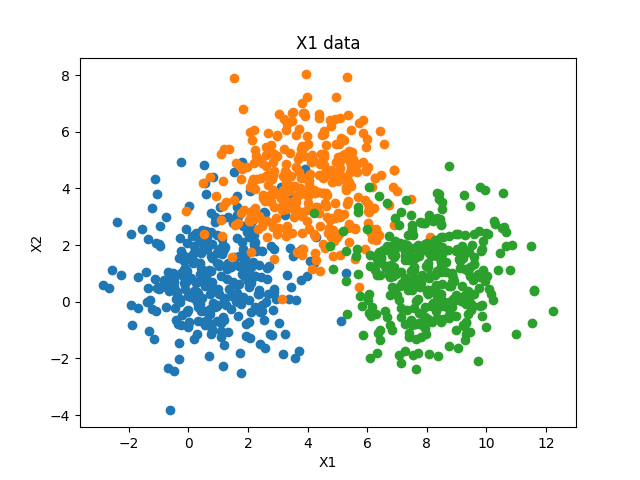

In [4]:
for j in range(len(temp_X1)):
    plt.scatter(temp_X1[j][:, 0], temp_X1[j][:, 1])
plt.title("X1 data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
plt.close()

## 绘制$\Chi_2$图像

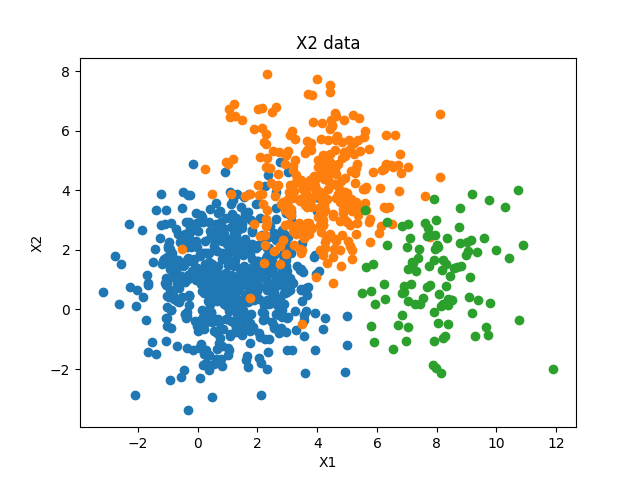

In [5]:
for j in range(len(temp_X2)):
    plt.scatter(temp_X2[j][:, 0], temp_X2[j][:, 1])
plt.title("X2 data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()
plt.close()

## 第二问
在两个数据集上分别应用“似然率决策规则”、“贝叶斯风险决策规则”（其中
$C_{12} = 2$, $C_{13} = 3$, $C_{23} = 2.5$, $C_{11} = C_{22} = C_{33} = 0$, $C_{21} = C_{31} = C_{32} = 1$）、“最小欧几里
得距离分类器”进行样本分类实验，给出实验过程设计（包括源代码）和实验结果。

### 决策规则:
在每个样本x处选择**最大化**或**最小化**某个函数$g_i(x)$的类标签$\omega_i$

$$
\text{decide } x \in \omega_i \text{ if } g_i(x) > g_j(x) \forall j \neq i
$$

In [6]:
# 添加绘图功能
def plot_data(result, result_error, name):
    for i in range(len(result)):
        plt.scatter(result[i][:, 0], result[i][:, 1])
    plt.scatter(result_error[:, 0], result_error[:, 1])
    plt.title(f"{name} predict data")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()
    plt.close()

#### 欧几里得距离分类器
其表达式为:
$$
g_i(x) = - \frac{1}{2}(x-m_i)^\Tau(x-m_i)
$$

In [7]:
def min_euclid_distance(x, m):
    temp = x - m
    return - (1 / 2) * np.dot(temp, temp)

# 欧几里得距离分类器对所有可能种类做出判定，并取结合决策器给出最大可能预估
def calculate_euclid(x, m_all):
    temp_distance = None
    temp_index = 0
    for i in range(len(m_all)):
        current = min_euclid_distance(x, m_all[i])
        if temp_distance is None or temp_distance < current:
            temp_index = i
            temp_distance = current
    return temp_index + 1

def predict_euclid(X, y, m_all, name):
    size = X.shape[0]
    error_count = 0
    result_temp = []
    for _ in range(len(m_all)):
        result_temp.append([])
    result_error_temp = []
    for i in range(size):
        predict = calculate_euclid(X[i], m_all)
        if predict != y[i]:
            error_count += 1
            result_error_temp.append([X[i][0], X[i][1]])
        else:
            result_temp[predict - 1].append([X[i][0], X[i][1]])
    result = []
    for item in result_temp:
        result.append(np.array(item))

    result_error = np.array(result_error_temp)
    print(f'欧几里得距离分类器:{name}错误率为:{error_count / size}')
    return result, result_error

result_X1_euclid,result_error_X1_euclid = predict_euclid(X1, y1, default_mean, 'X1')
result_X2_euclid,result_error_X2_euclid = predict_euclid(X2, y2, default_mean, 'X2')

欧几里得距离分类器:X1错误率为:0.071
欧几里得距离分类器:X2错误率为:0.065


##### 对新分类数据画图并标注错误

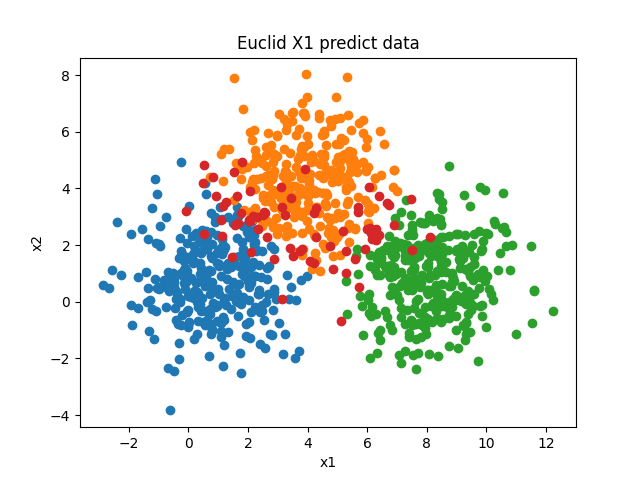

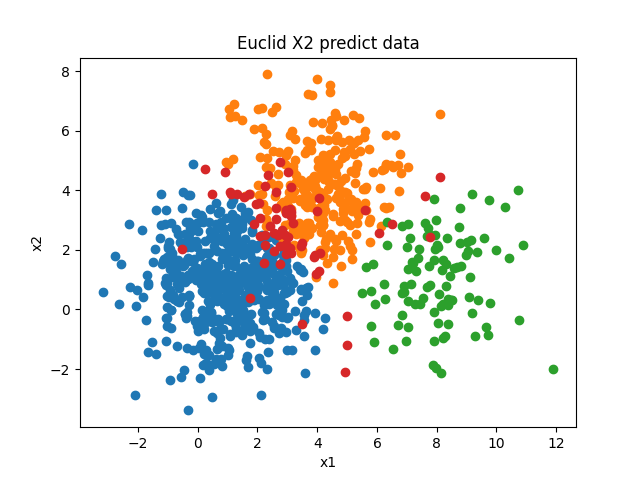

In [9]:
plot_data(result_X1_euclid, result_error_X1_euclid, 'Euclid X1')
plot_data(result_X2_euclid, result_error_X2_euclid, 'Euclid X2')